In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.datasets import load_digits 
from sklearn import datasets, model_selection 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm 

In [2]:
mnist = datasets.fetch_mldata('MNIST original', data_home='../data/mnist/')
mnist

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

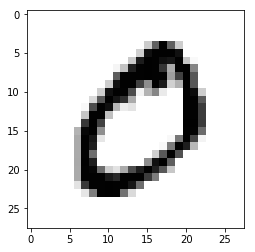

784

In [3]:
mnist_data = mnist.data / 255
pd.DataFrame(mnist_data)
plt.imshow(mnist_data[0].reshape(28,28), cmap=cm.gray_r)
plt.show()
len(mnist_data[0])

In [4]:
mnist_label = mnist.target
mnist_label 

array([0., 0., 0., ..., 9., 9., 9.])

In [5]:
train_size = 5000
test_size = 500 
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, mnist_label, train_size=train_size, test_size=test_size)

In [6]:
len(train_X), len(test_X), len(train_Y), len(test_Y)

(5000, 500, 5000, 500)

In [7]:
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

In [8]:
train_X, train_Y, test_X, test_Y

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([7, 4, 3,  ..., 1, 7, 0]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([2, 1, 6, 4, 9, 2, 2, 3, 5, 9, 1, 6, 3, 0, 0, 4, 3, 7, 3, 8, 1, 9, 7, 6,
         5, 9, 6, 6, 8, 3, 0, 7, 0, 7, 2, 3, 2, 0, 2, 5, 9, 9, 8, 0, 8, 1, 7, 7,
         9, 6, 2, 6, 9, 5, 7, 3, 3, 4, 9, 2, 9, 9, 7, 9, 2, 4, 6, 3, 7, 3, 0, 8,
         7, 4, 0, 2, 5, 2, 2, 3, 2, 9, 5, 9, 0, 9, 8, 5, 1, 5, 4, 6, 4, 1, 2, 7,
         6, 0, 1, 0, 5, 1, 6, 4, 8, 8, 4, 0, 6, 5, 0, 0, 6, 0, 8, 2, 3, 3, 1, 8,
         9, 8, 4, 4, 0, 2, 3, 8, 1, 

In [9]:
train = TensorDataset(train_X, train_Y)

In [10]:
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,256)
        self.fc3 = nn.Linear(256,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,128)
        self.fc6 = nn.Linear(128,10)
    
    def forward(self, x):
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= F.relu(self.fc3(x))
        x= F.relu(self.fc4(x))
        x= F.relu(self.fc5(x))
        x= F.dropout(x, training=self.training)
        x= self.fc6(x)
        return F.log_softmax(x)        


In [12]:
model = Net().cuda()

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
    total_loss = 0
    for train_x, train_y in train_loader:
        train_x, train_y = Variable(train_x.cuda()), Variable(train_y.cuda())
        optimizer.zero_grad()
        output = model(train_x)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


100 34.65004462003708
200 3.414127079769969
300 0.4749657209031284
400 0.22852421621792018
500 0.1305157010210678
600 0.1052886814577505
700 0.1012737910496071
800 0.0573591028660303
900 0.06339436754933558
1000 0.0738760496096802


In [14]:
test_x, test_y = Variable(test_X.cuda()), Variable(test_Y.cuda())

In [15]:
result = torch.max(model(test_x).cpu().data, 1)[1]

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [16]:
accuracy = sum(test_y.cpu().data.numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())

In [17]:
accuracy

0.908